# Search stocks

In [22]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [23]:
ndx_quotes = ["AAPL", 
"ADBE", 
"ADI", 
"ADP", 
"ADSK", 
"AEP", 
"ALGN", 
"ALXN", 
"AMAT", 
"AMD", 
"AMGN", 
"AMZN", 
"ANSS", 
"ASML", 
"ATVI", 
"AVGO", 
"BIDU", 
"BIIB", 
"BKNG", 
"CDNS", 
"CDW", 
"CERN", 
"CHKP", 
"CHTR", 
"CMCSA", 
"COST", 
"CPRT", 
"CSCO", 
"CSX", 
"CTAS", 
"CTSH", 
"DLTR", 
"DOCU", 
"DXCM", 
"EA", 
"EBAY", 
"EXC", 
"FAST", 
"FB", 
"FISV", 
"FOX", 
"FOXA", 
"GILD", 
"GOOG", 
"GOOGL", 
"IDXX", 
"ILMN", 
"INCY", 
"INTC", 
"INTU", 
"ISRG", 
"JD", 
"KDP", 
"KHC", 
"KLAC", 
"LRCX", 
"LULU", 
"MAR", 
"MCHP", 
"MDLZ", 
"MELI", 
"MNST", 
"MRNA", 
"MRVL", 
"MSFT", 
"MTCH", 
"MU", 
"MXIM", 
"NFLX", 
"NTES", 
"NVDA", 
"NXPI", 
"OKTA", 
"ORLY", 
"PAYX", 
"PCAR", 
"PDD", 
"PEP", 
"PTON", 
"PYPL", 
"QCOM", 
"REGN", 
"ROST", 
"SBUX", 
"SGEN", 
"SIRI", 
"SNPS", 
"SPLK", 
"SWKS", 
"TCOM", 
"TEAM", 
"TMUS", 
"TSLA", 
"TXN", 
"VRSK", 
"VRSN", 
"VRTX", 
"WBA", 
"WDAY", 
"XEL", 
"XLNX", 
"ZM"]

ma_count = 21


data = pdr.get_data_yahoo(ndx_quotes, start="2020-01-01", end=dt.date.today())['Close']
data.tail()


Symbols,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,ALXN,AMAT,AMD,...,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-15,129.639999,548.460022,167.619995,199.029999,276.760010,85.239998,600.049988,181.899994,138.639999,80.470001,...,599.359985,188.610001,172.570007,220.779999,188.970001,54.240002,231.809998,69.190002,127.040001,359.000000
2021-06-16,130.149994,543.330017,166.020004,197.229996,273.709991,84.400002,599.599976,180.550003,136.979996,80.110001,...,604.869995,187.729996,170.899994,218.800003,187.490005,53.310001,230.199997,67.760002,126.180000,361.829987
2021-06-17,131.789993,551.359985,166.220001,197.500000,276.339996,84.389999,613.330017,179.970001,137.320007,84.559998,...,616.599976,187.649994,172.990005,223.259995,188.360001,52.810001,235.039993,68.349998,132.339996,372.950012
2021-06-18,130.460007,565.590027,162.190002,192.899994,277.980011,82.349998,601.640015,180.690002,131.229996,84.650002,...,623.309998,183.070007,171.089996,223.169998,187.850006,50.840000,236.490005,66.599998,131.919998,374.239990
2021-06-21,132.300003,567.349976,164.149994,196.470001,283.220001,83.190002,611.539978,180.660004,133.050003,82.589996,...,620.830017,186.110001,174.910004,224.740005,187.699997,51.930000,236.929993,67.139999,127.529999,369.250000


In [24]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 10].size)
lead_comps_df = df[df['count'] >= 10]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

28


,name,count,ma_diff,ma_size,ma_type
20,DOCU,17,18.250518,21,daily
10,BIIB,12,12.833726,21,daily
52,TEAM,12,12.393550,21,daily
21,DXCM,17,10.070288,21,daily
1,ADBE,20,8.972941,21,daily
36,MRVL,22,8.887123,21,daily
40,NVDA,22,8.002306,21,daily
59,ZM,22,7.896927,21,daily
29,ILMN,22,7.877390,21,daily
33,LULU,12,6.600109,21,daily


<ipython-input-25-1514944d5d33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


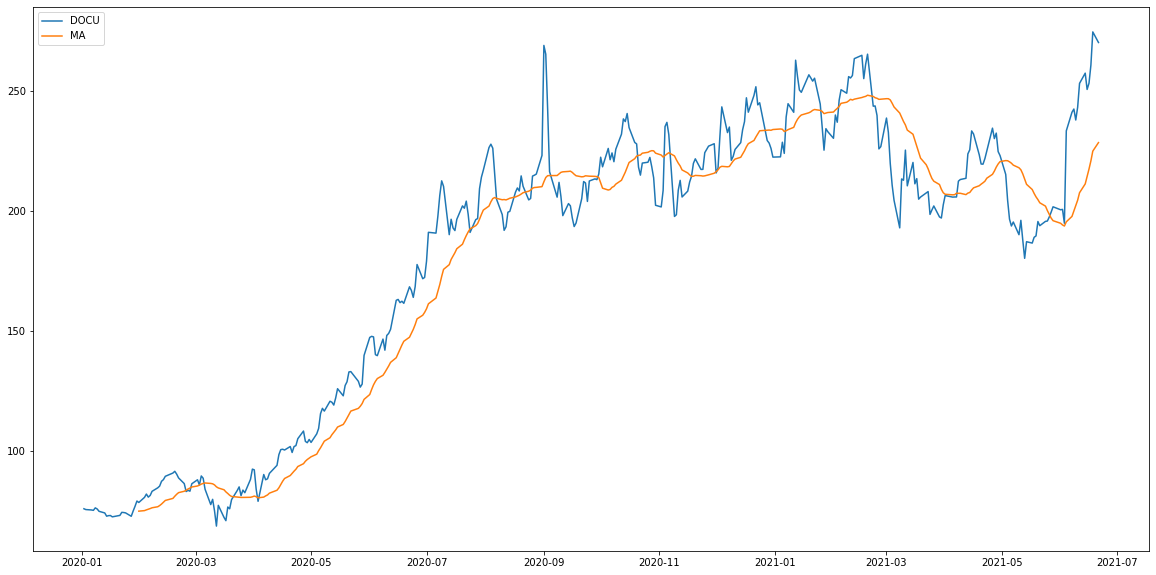

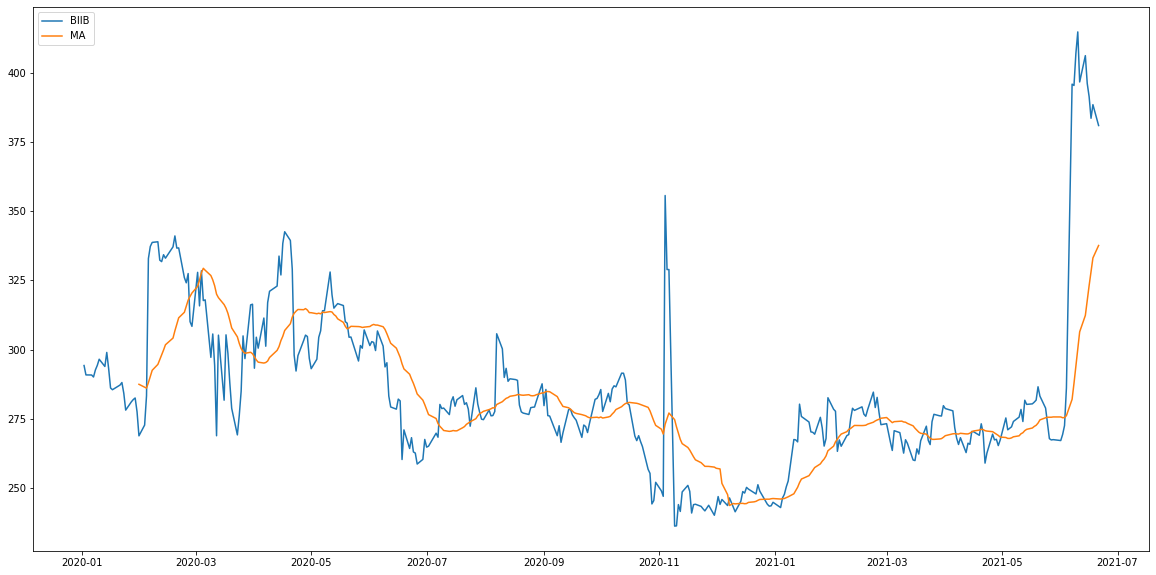

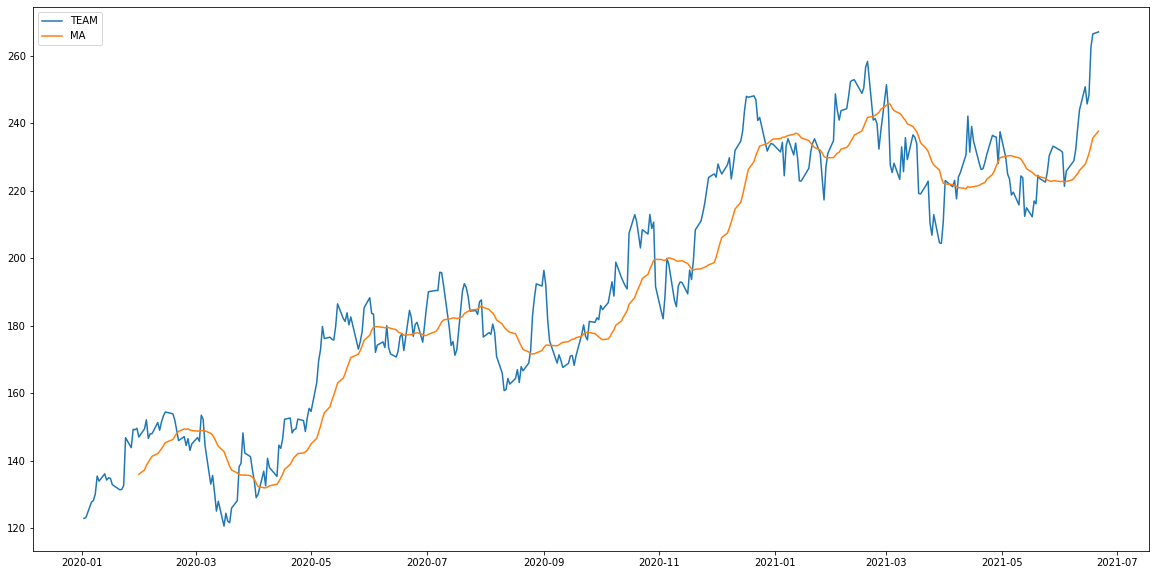

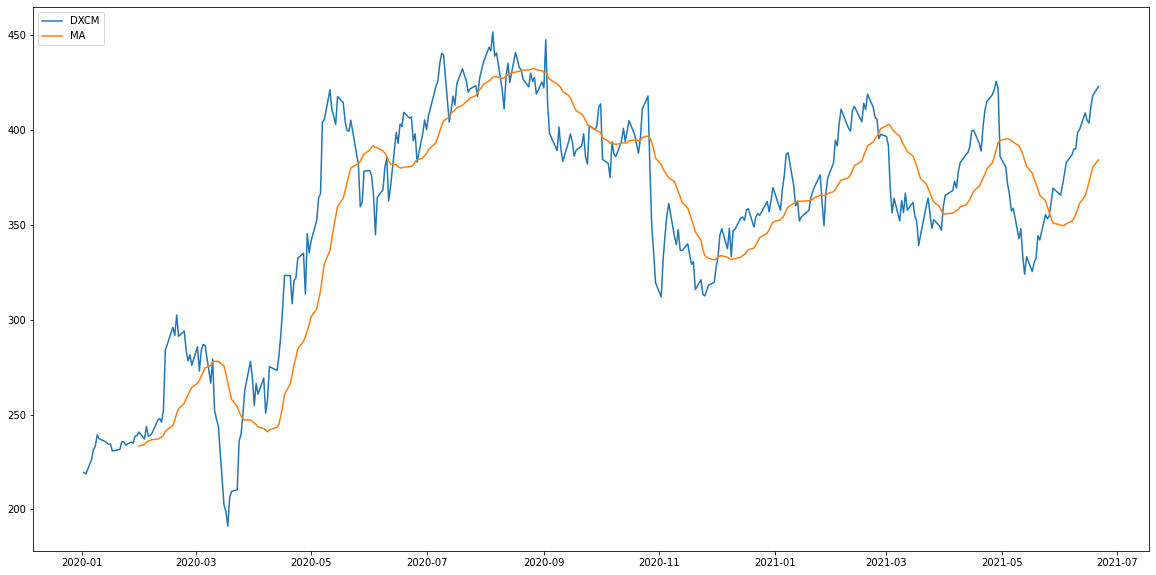

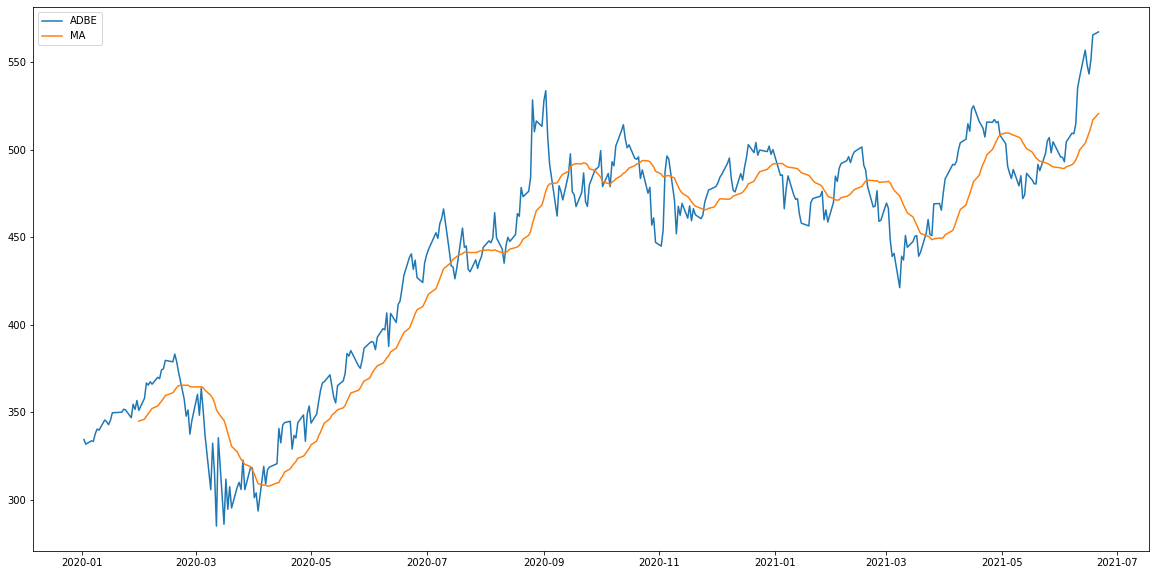

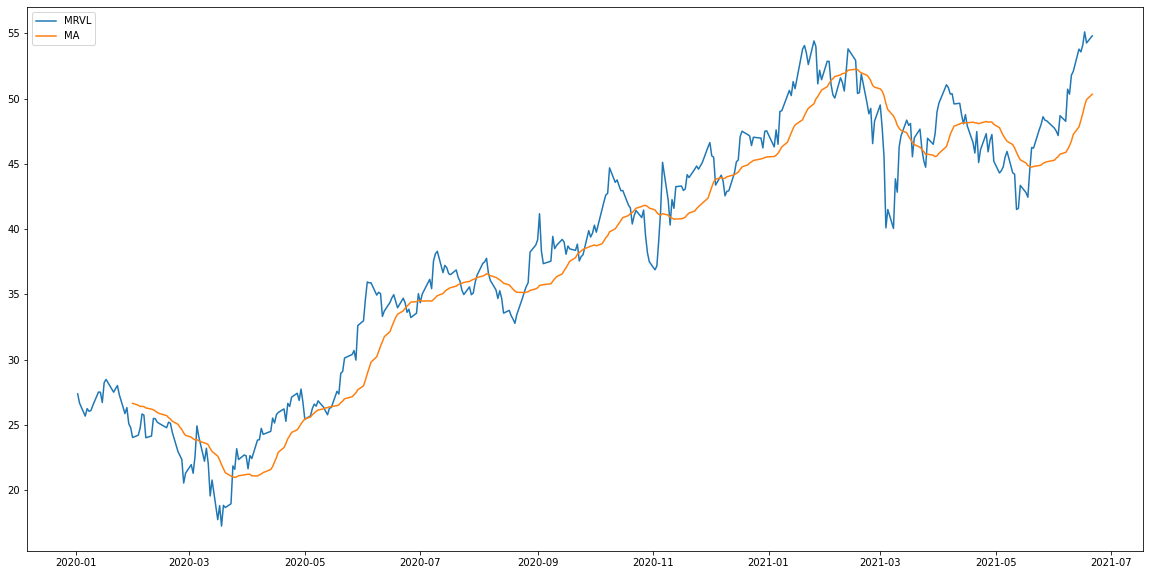

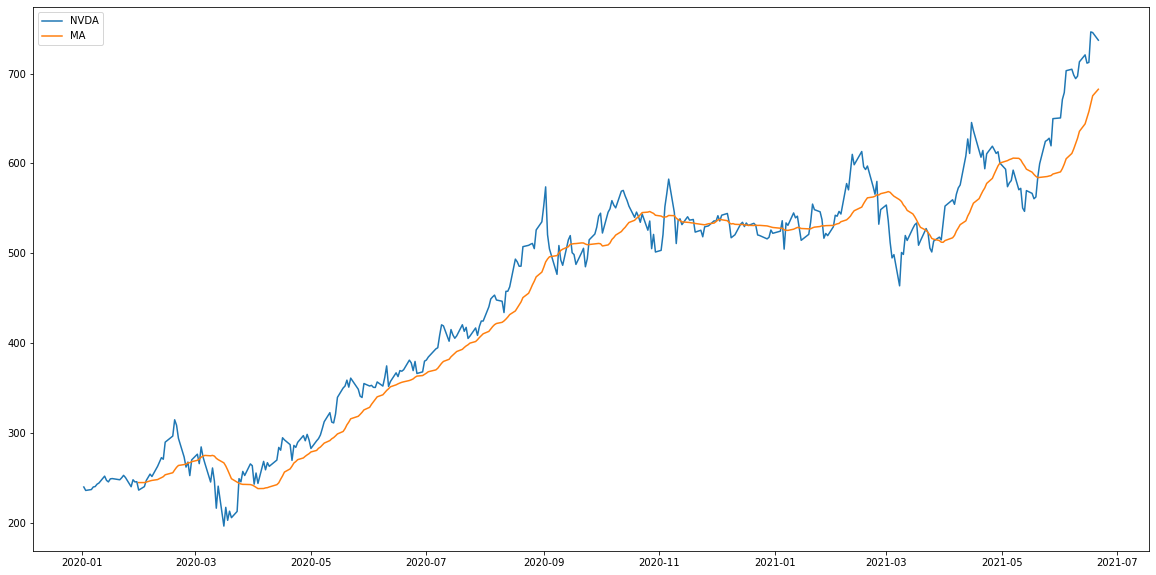

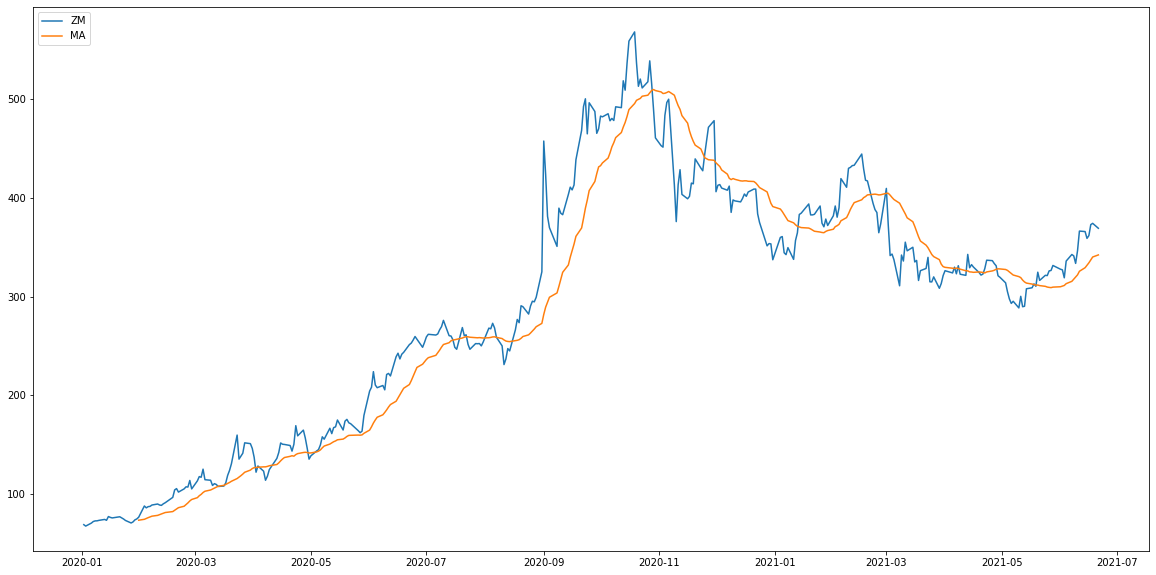

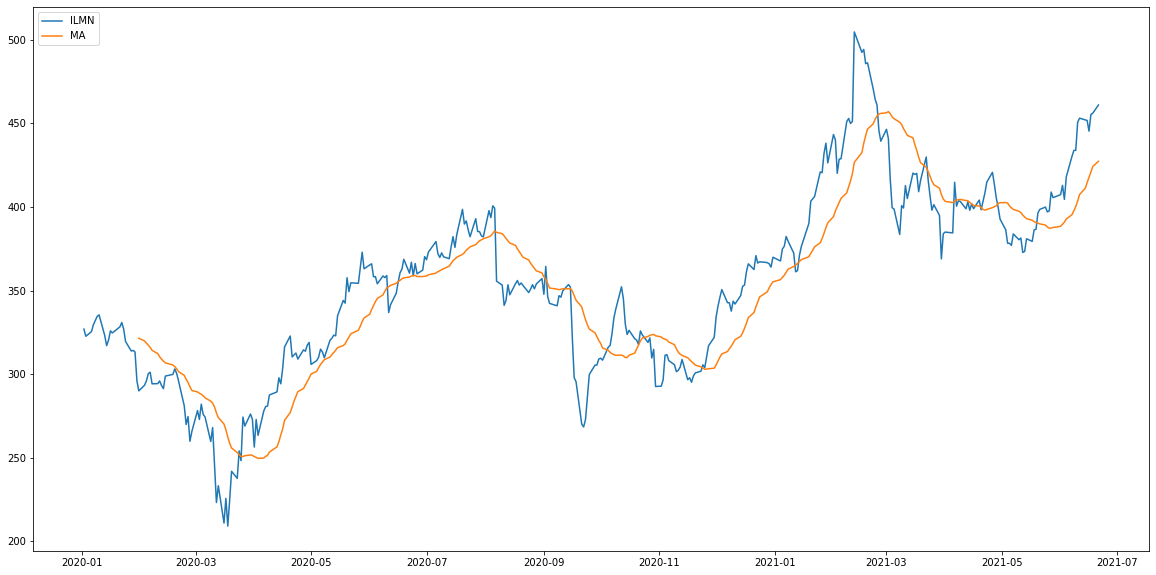

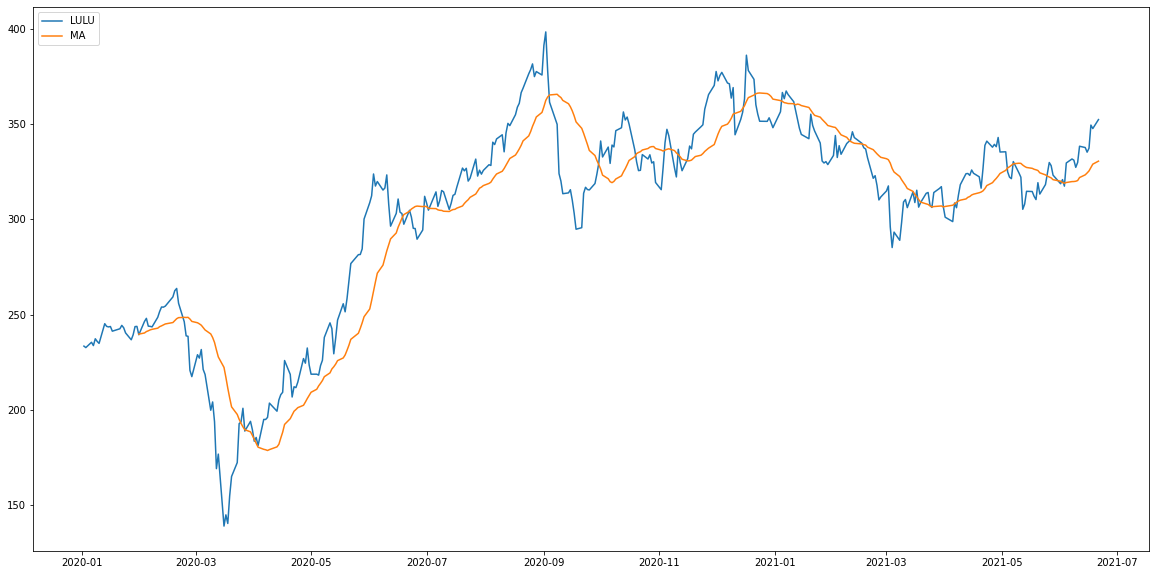

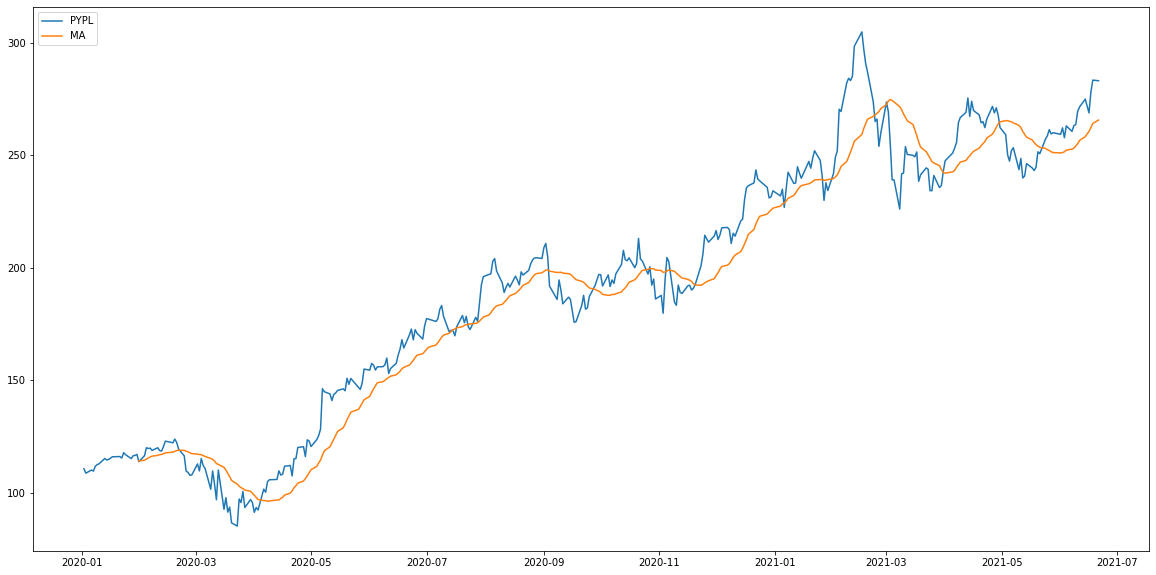

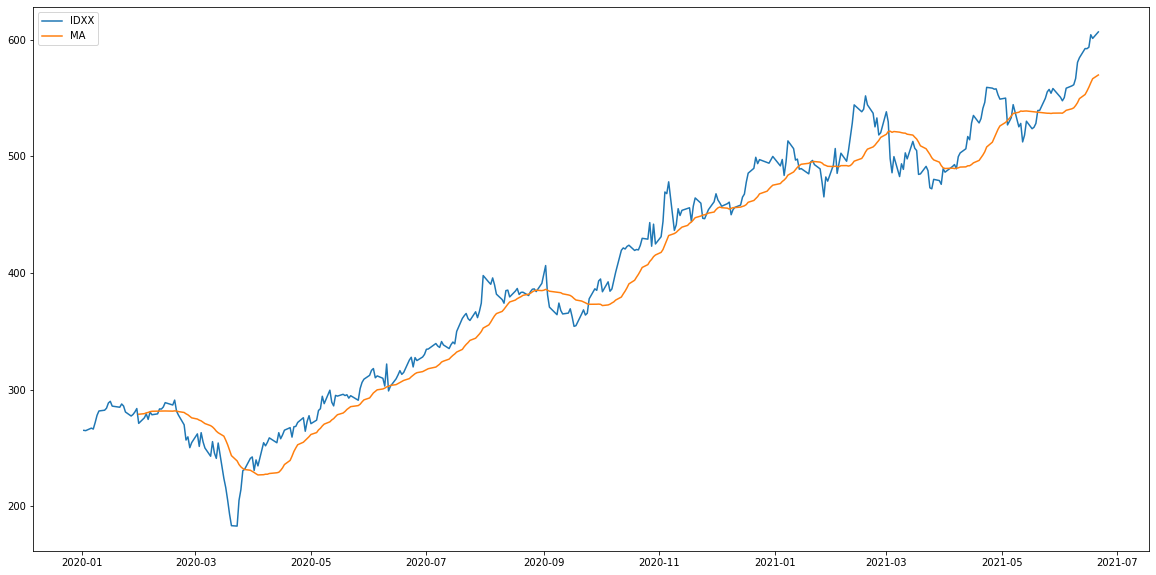

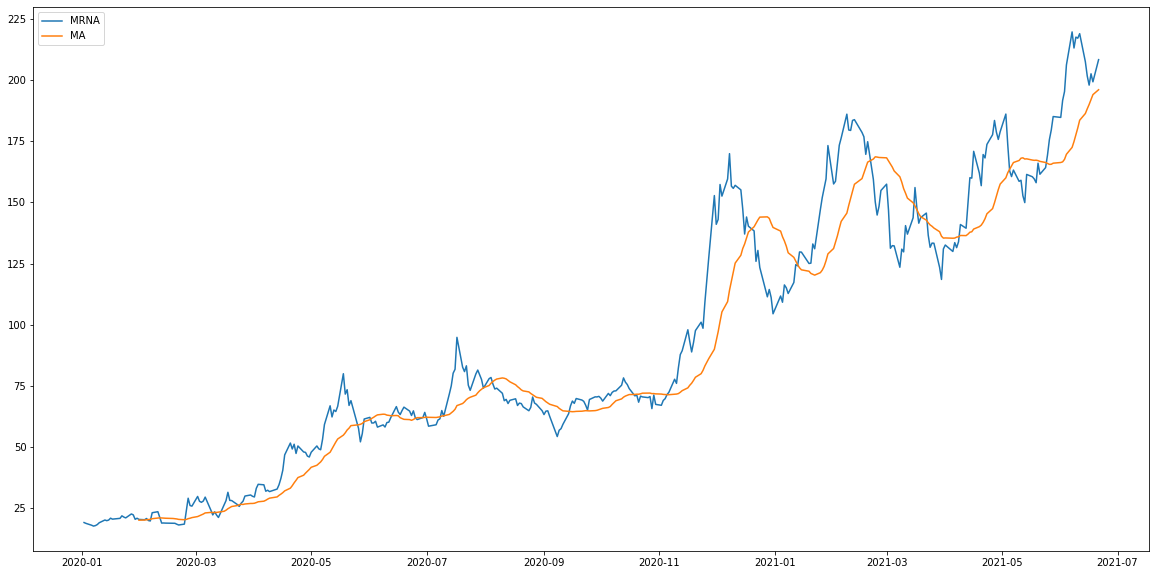

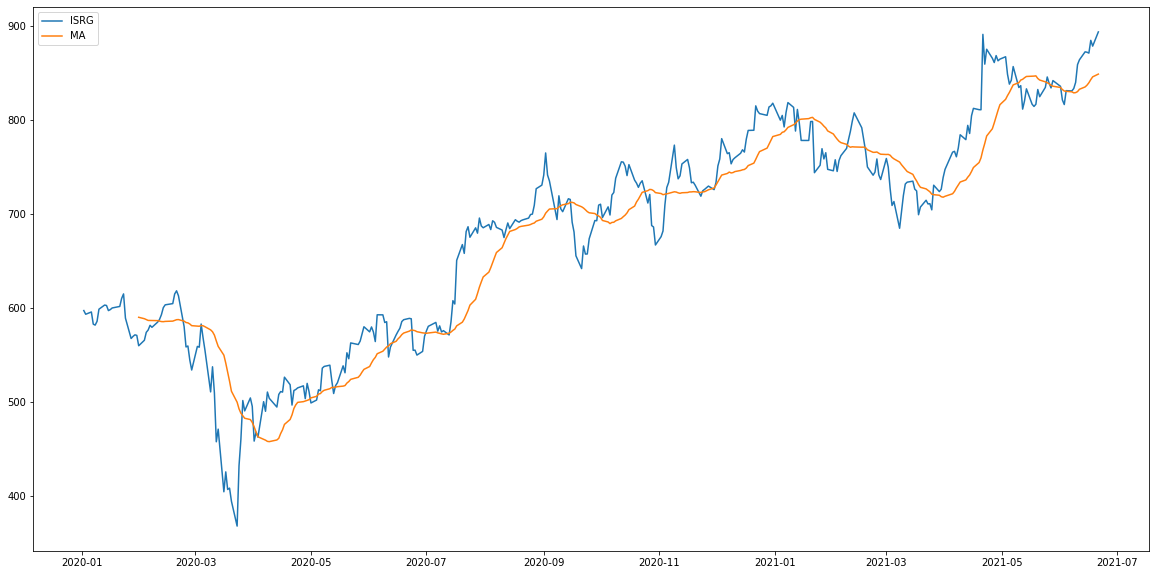

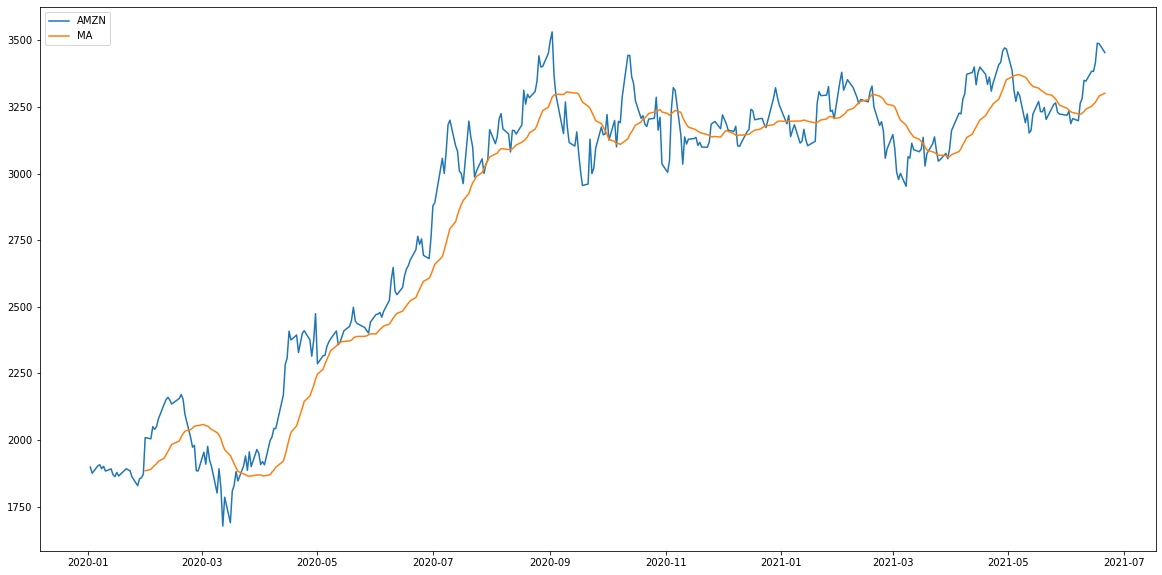

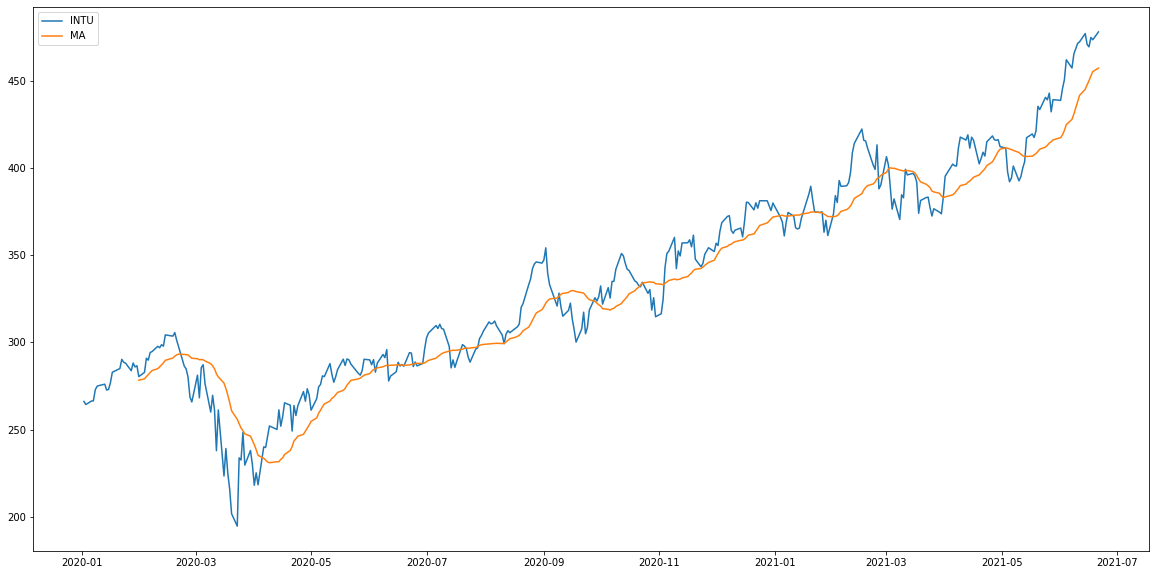

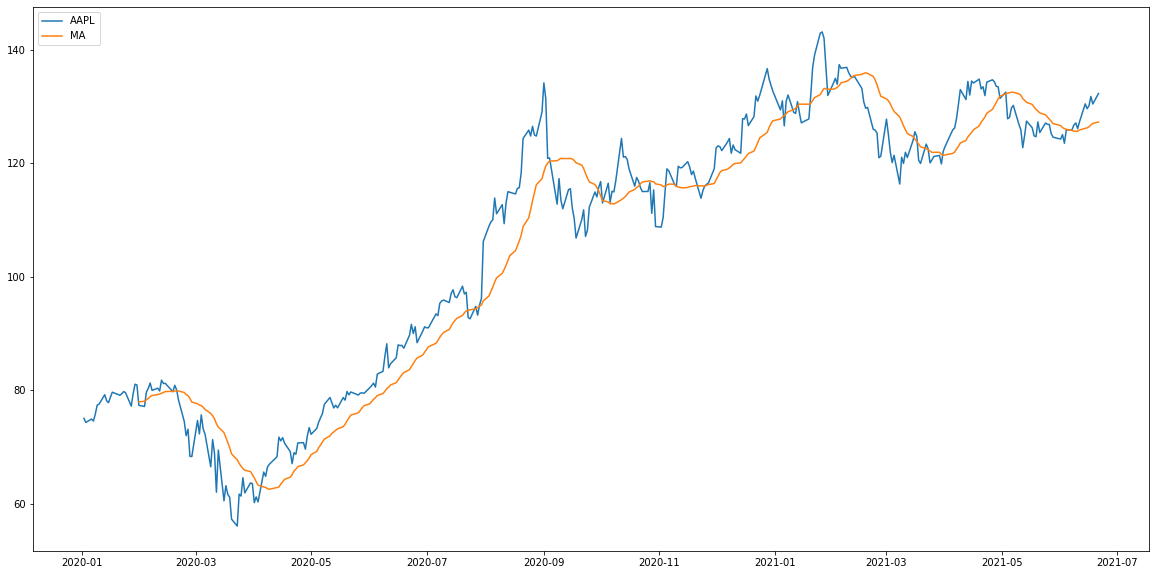

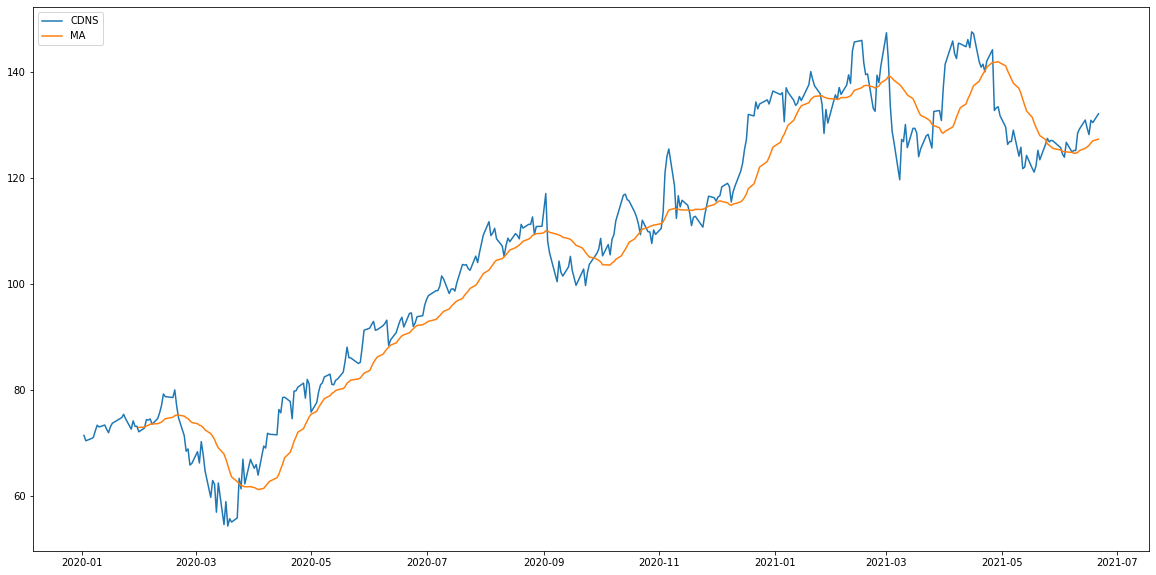

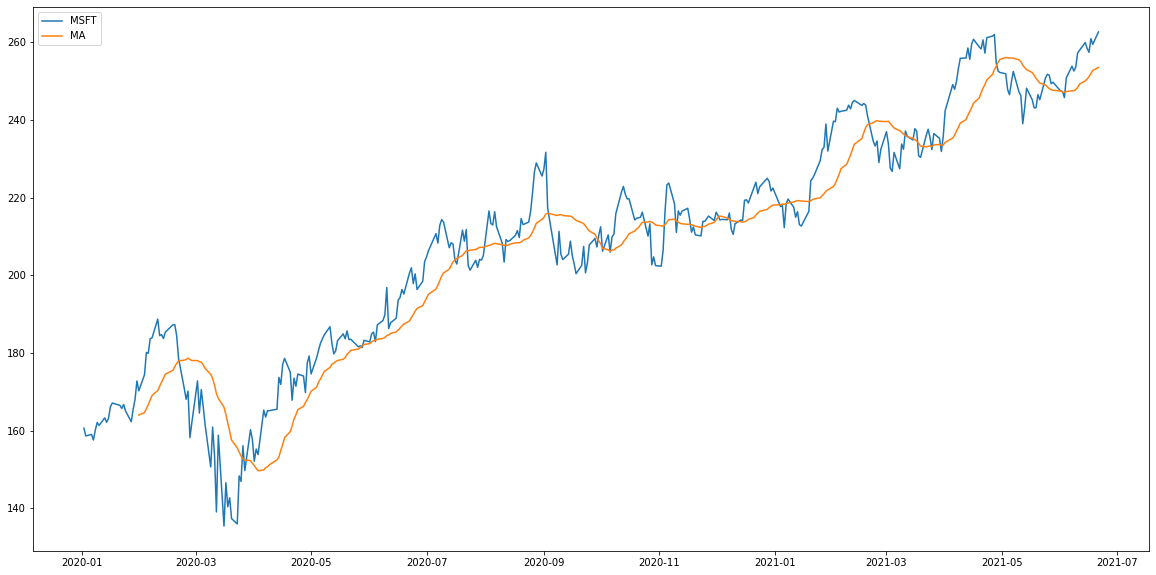

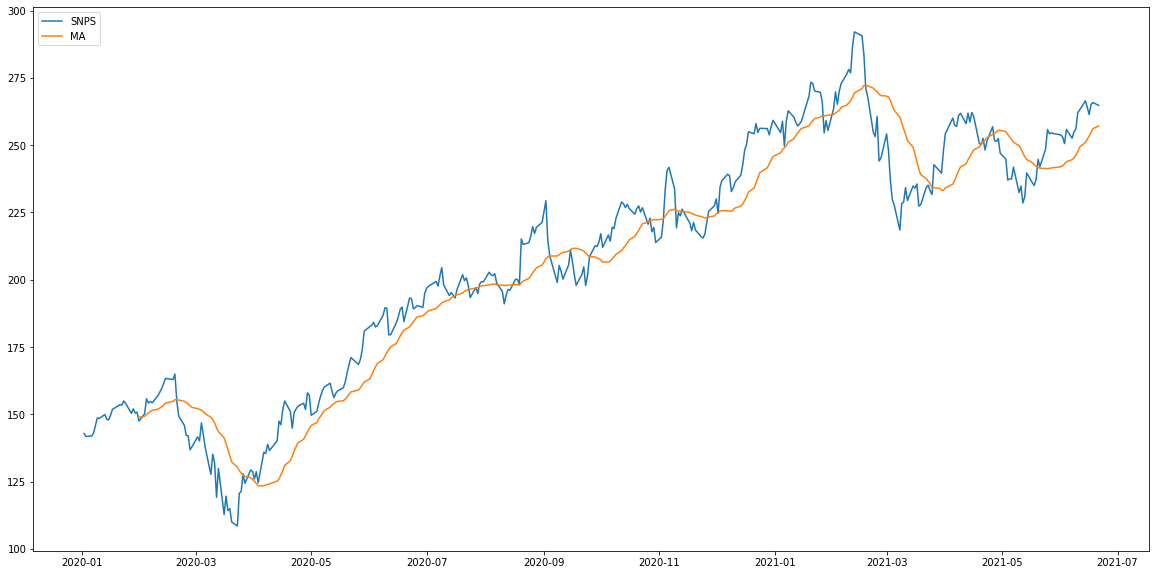

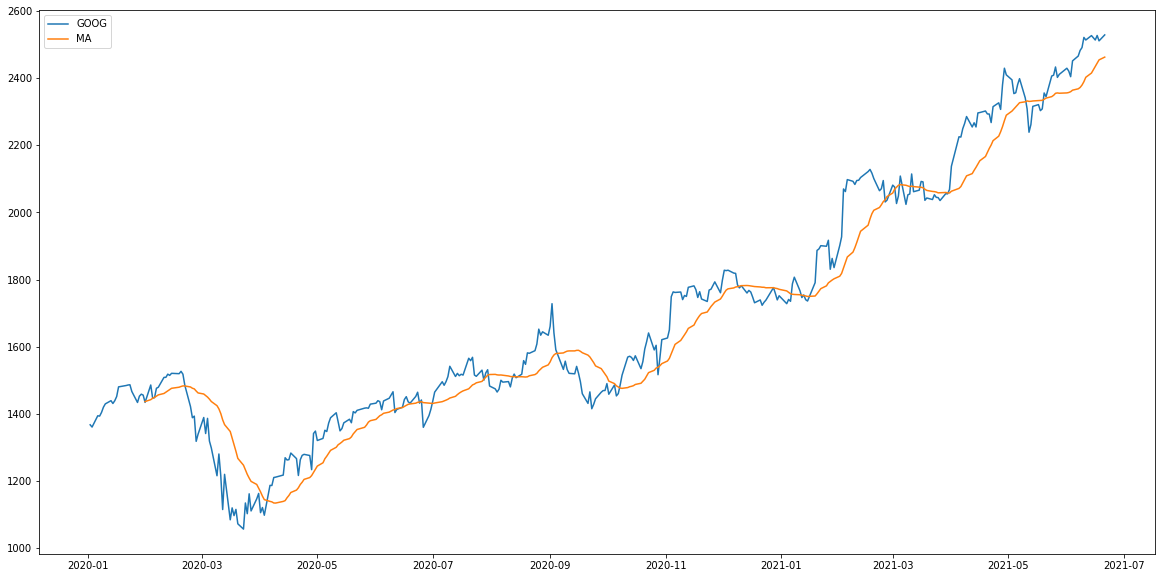

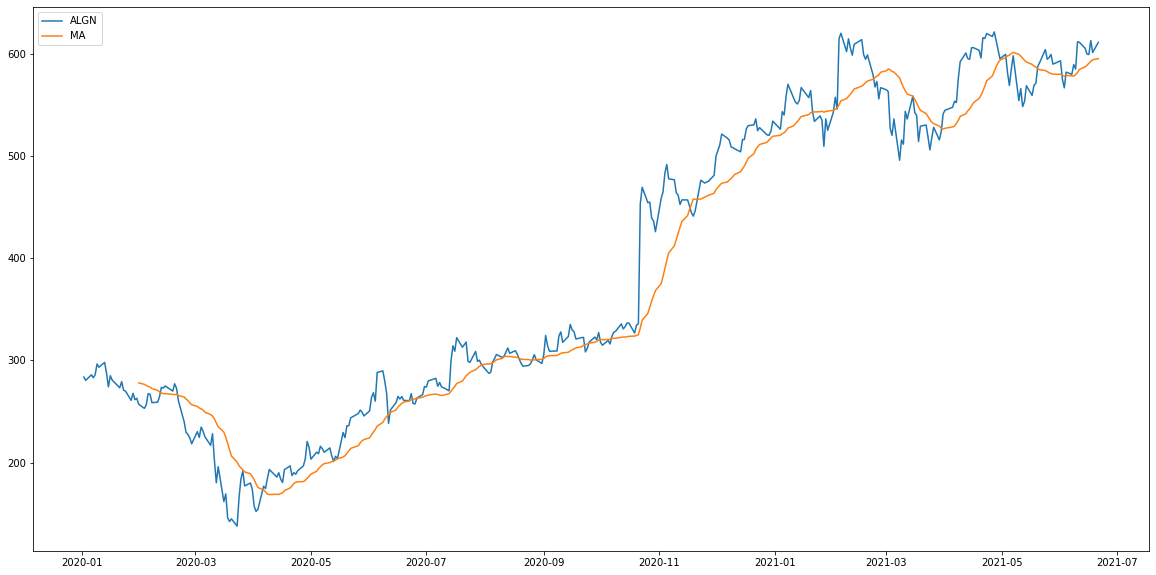

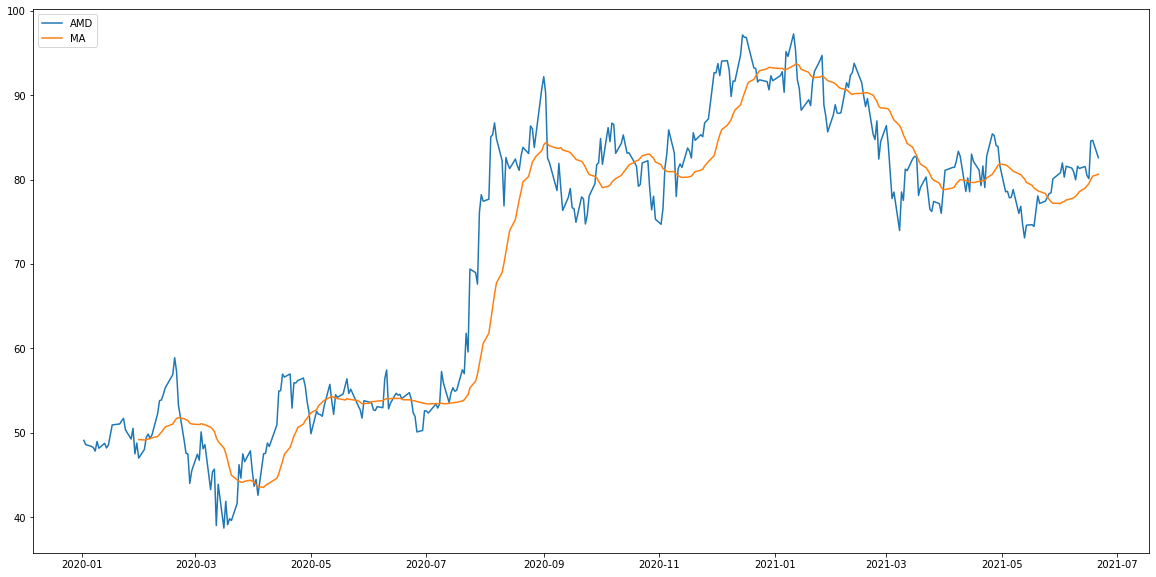

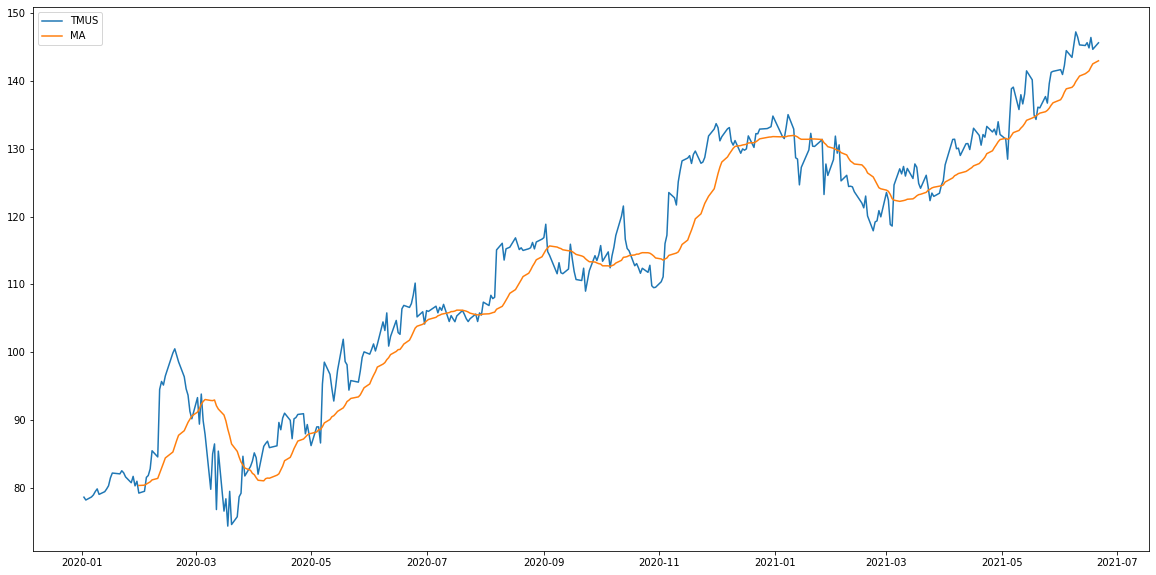

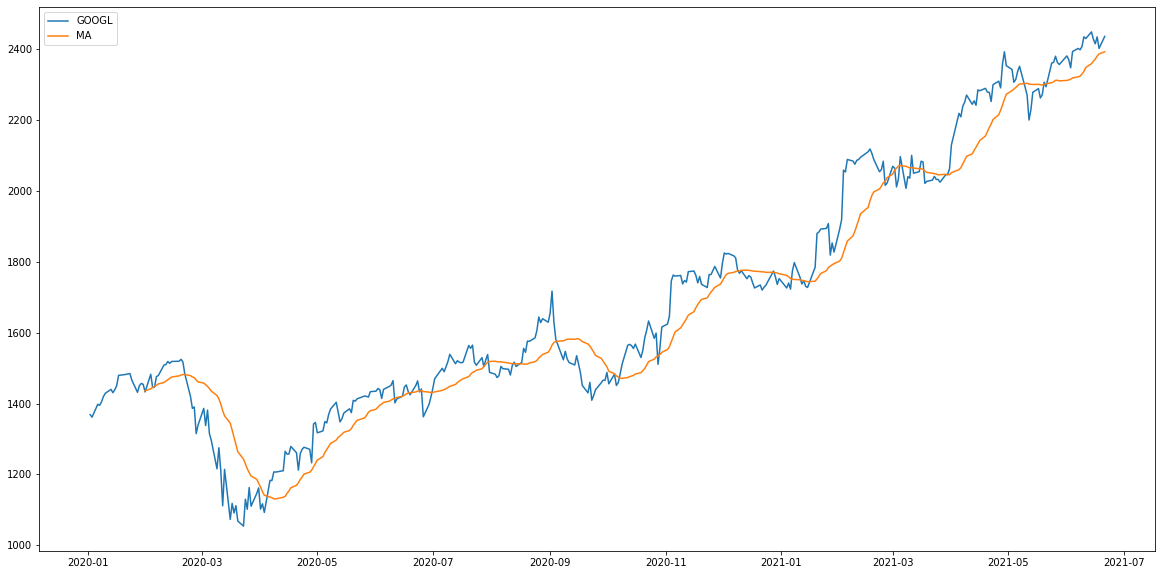

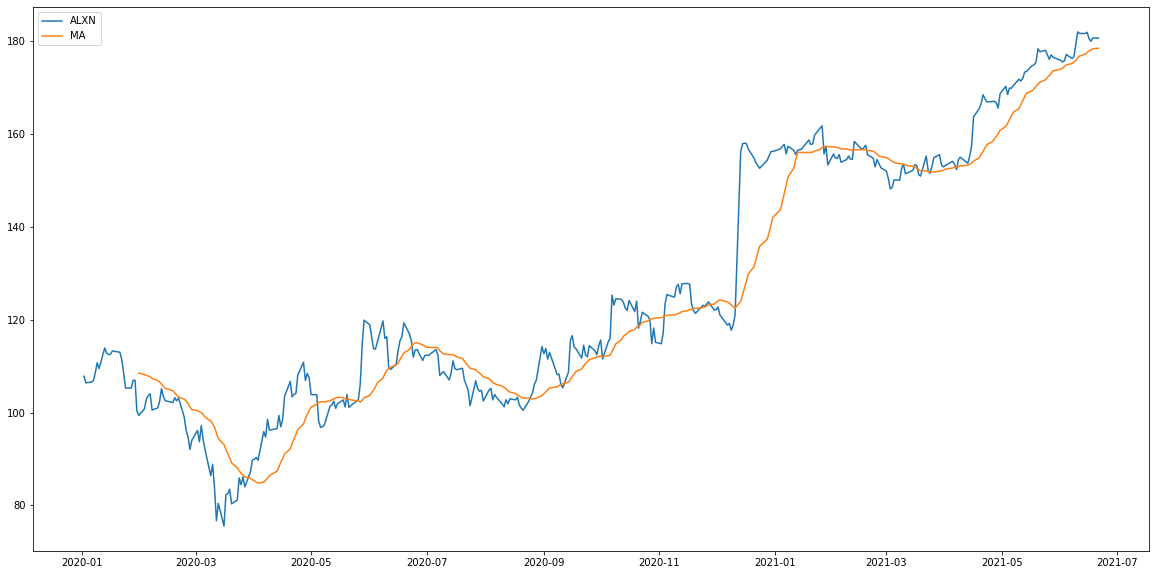

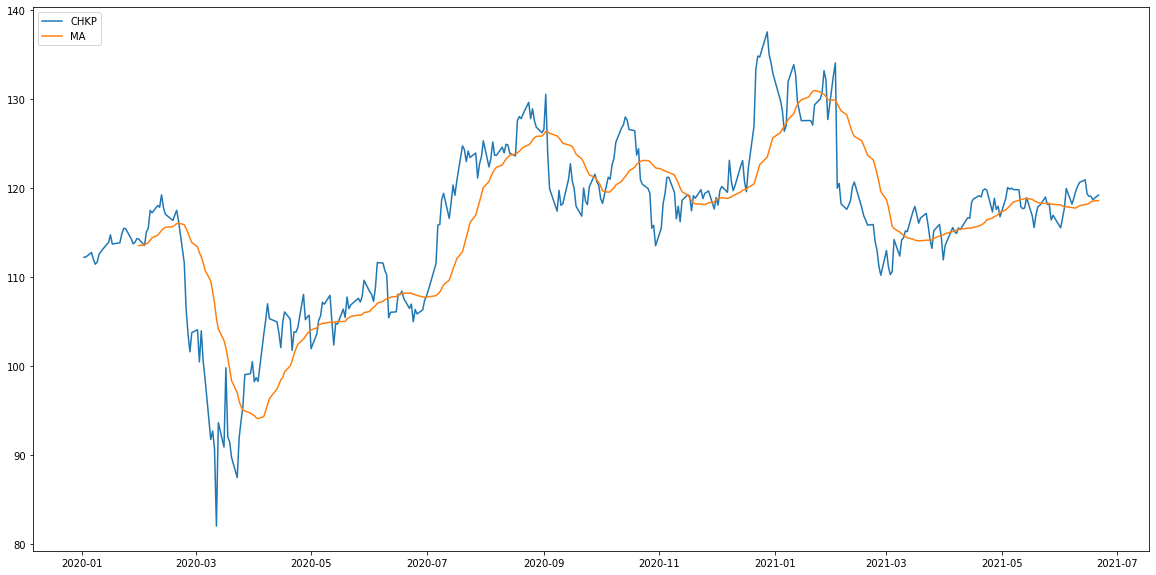

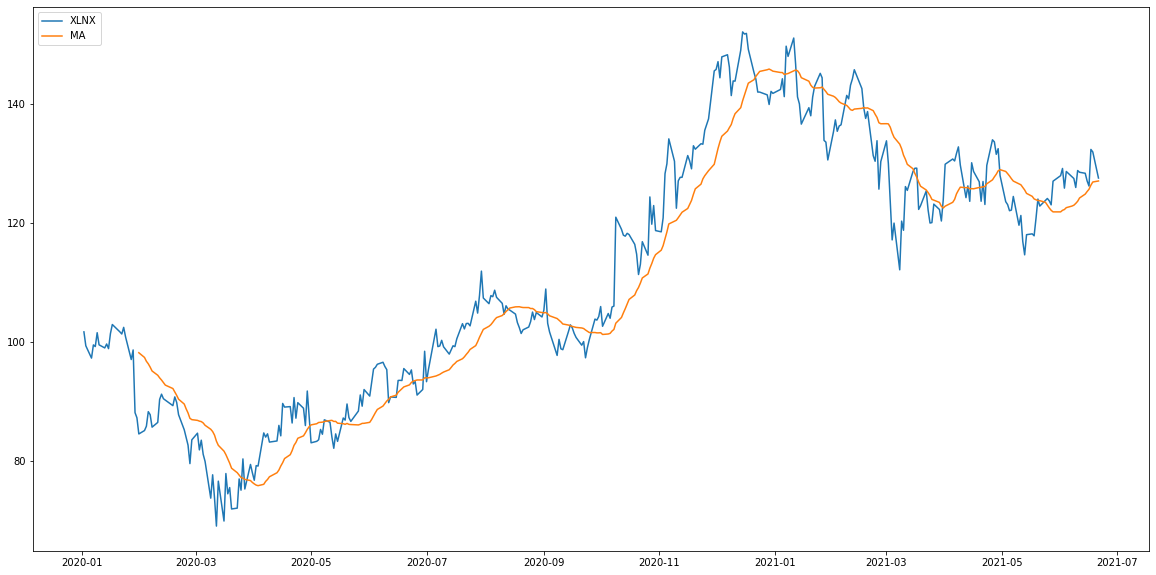

In [25]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);